In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [3]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
columntransformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [3])], remainder = 'passthrough')
X = np.array(columntransformer.fit_transform(X), dtype=np.integer)
print(X)

[[     0      0      1 165349 136897 471784]
 [     1      0      0 162597 151377 443898]
 [     0      1      0 153441 101145 407934]
 [     0      0      1 144372 118671 383199]
 [     0      1      0 142107  91391 366168]
 [     0      0      1 131876  99814 362861]
 [     1      0      0 134615 147198 127716]
 [     0      1      0 130298 145530 323876]
 [     0      0      1 120542 148718 311613]
 [     1      0      0 123334 108679 304981]
 [     0      1      0 101913 110594 229160]
 [     1      0      0 100671  91790 249744]
 [     0      1      0  93863 127320 249839]
 [     1      0      0  91992 135495 252664]
 [     0      1      0 119943 156547 256512]
 [     0      0      1 114523 122616 261776]
 [     1      0      0  78013 121597 264346]
 [     0      0      1  94657 145077 282574]
 [     0      1      0  91749 114175 294919]
 [     0      0      1  86419 153514      0]
 [     1      0      0  76253 113867 298664]
 [     0      0      1  78389 153773 299737]
 [     0  

In [4]:
# Avoiding dummy variable trap
X = X[:, 1:]
print(X)
print(len(np.array(X[0])))

[[     0      1 165349 136897 471784]
 [     0      0 162597 151377 443898]
 [     1      0 153441 101145 407934]
 [     0      1 144372 118671 383199]
 [     1      0 142107  91391 366168]
 [     0      1 131876  99814 362861]
 [     0      0 134615 147198 127716]
 [     1      0 130298 145530 323876]
 [     0      1 120542 148718 311613]
 [     0      0 123334 108679 304981]
 [     1      0 101913 110594 229160]
 [     0      0 100671  91790 249744]
 [     1      0  93863 127320 249839]
 [     0      0  91992 135495 252664]
 [     1      0 119943 156547 256512]
 [     0      1 114523 122616 261776]
 [     0      0  78013 121597 264346]
 [     0      1  94657 145077 282574]
 [     1      0  91749 114175 294919]
 [     0      1  86419 153514      0]
 [     0      0  76253 113867 298664]
 [     0      1  78389 153773 299737]
 [     1      0  73994 122782 303319]
 [     1      0  67532 105751 304768]
 [     0      1  77044  99281 140574]
 [     0      0  64664 139553 137962]
 [     1    

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-6.85994341e-01  1.39326109e+00  2.01641858e+00  5.60742020e-01
   2.15394719e+00]
 [-6.85994341e-01 -7.17740563e-01  1.95585640e+00  1.08280387e+00
   1.92360082e+00]
 [ 1.45773797e+00 -7.17740563e-01  1.75436392e+00 -7.28260419e-01
   1.62652786e+00]
 [-6.85994341e-01  1.39326109e+00  1.55478602e+00 -9.63780980e-02
   1.42220965e+00]
 [ 1.45773797e+00 -7.17740563e-01  1.50494106e+00 -1.07993109e+00
   1.28152870e+00]
 [-6.85994341e-01  1.39326109e+00  1.27979148e+00 -7.76248286e-01
   1.25421193e+00]
 [-6.85994341e-01 -7.17740563e-01  1.34006757e+00  9.32134225e-01
  -6.88153288e-01]
 [ 1.45773797e+00 -7.17740563e-01  1.24506506e+00  8.71996161e-01
   9.32184639e-01]
 [-6.85994341e-01  1.39326109e+00  1.03036862e+00  9.86936297e-01
   8.30888737e-01]
 [-6.85994341e-01 -7.17740563e-01  1.09181106e+00 -4.56629619e-01
   7.76106513e-01]
 [ 1.45773797e+00 -7.17740563e-01  6.20407572e-01 -3.87586218e-01
   1.49803281e-01]
 [-6.85994341e-01 -7.17740563e-01  5.93075368e-01 -1.06554554e+00

In [6]:
# Hyperparameters
learning_rate = 0.0095
initial_b = 0   #initial_bias
initial_m = 0   # initial_weight
num_iterations = 2000

In [7]:
def compute_cost(X, y, m):
    N = len(y)
    total_cost = np.sum((np.dot(X, m) - y) ** 2)/(2 * N) 
    return total_cost

In [8]:
def gradient_descent(X, y, m, learning_rate, num_iterations):
    cost_graph = [0] * num_iterations
    N = len(y)
    
    for i in range(num_iterations):
        # Hypothesis values
        #h = X.dot(m)
        h = np.dot(X, m)
        # Difference b/w Hypothesis and Actual Y
        loss = h - y
        # Gradient Calculation
        gradient = X.T.dot(loss) / N
        m -= learning_rate * gradient
        cost = compute_cost(X, y, m)
        cost_graph[i] = cost
        
    return m, cost_graph

In [9]:
# Splitting into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
m = np.zeros(X_train.shape[1])
print(m)
print(num_iterations)
new_m, cost_graph = gradient_descent(X_train, y_train, m, learning_rate, num_iterations)
print(new_m)
#print(cost_graph)

[0. 0. 0. 0. 0.]
2000
[-21820.81709328  -4266.56482664  26679.2934762   13985.65938561
   5246.3426303 ]


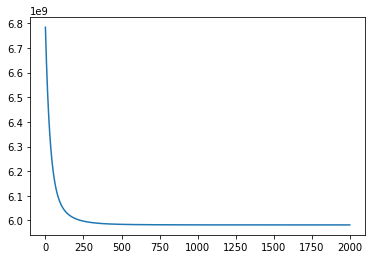

In [11]:
plt.plot(cost_graph)
plt.show()

ValueError: x and y must be the same size

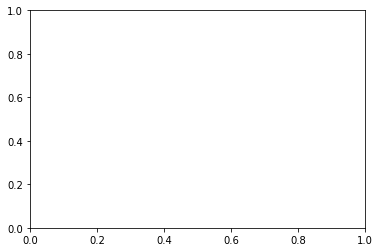

In [16]:
y_pred = m * X_test
plt.scatter(X_test, y_test)
plt.show()